In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ylearn import Why

/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-18 00:42:11,133 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [2]:
train_path = "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/data/prepared_process_logs/BPIC_17/activities/train.csv"
test_path = "/Users/lukas/Desktop/CI_Experiments/CI_Experiments/data/prepared_process_logs/BPIC_17/activities/test.csv"

In [3]:
train_data = pd.read_csv(train_path)
train_data.head()

,Outcome,Activity_A_Accepted,Activity_A_Cancelled,Activity_A_Complete,Activity_A_Concept,Activity_A_Create Application,Activity_A_Denied,Activity_A_Incomplete,Activity_A_Pending,Activity_A_Submitted,...,Activity_O_Sent (mail and online),Activity_O_Sent (online only),Activity_W_Assess potential fraud,Activity_W_Call after offers,Activity_W_Call incomplete files,Activity_W_Complete application,Activity_W_Handle leads,Activity_W_Personal Loan collection,Activity_W_Shortened completion,Activity_W_Validate application
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [23]:
why = Why(identifier='notears', random_state=23)
r = why.identify(train_data, 'Outcome')

In [5]:
r

(['Activity_A_Incomplete',
  'Activity_O_Returned',
  'Activity_A_Create Application'],
 None,
 ['Activity_A_Accepted',
  'Activity_A_Cancelled',
  'Activity_A_Complete',
  'Activity_A_Concept',
  'Activity_A_Denied',
  'Activity_A_Pending',
  'Activity_A_Submitted',
  'Activity_A_Validating',
  'Activity_O_Accepted',
  'Activity_O_Cancelled',
  'Activity_O_Create Offer',
  'Activity_O_Created',
  'Activity_O_Refused',
  'Activity_O_Sent (mail and online)',
  'Activity_O_Sent (online only)',
  'Activity_W_Assess potential fraud',
  'Activity_W_Call after offers',
  'Activity_W_Call incomplete files',
  'Activity_W_Complete application',
  'Activity_W_Handle leads',
  'Activity_W_Validate application'],
 None)

In [6]:
why.fit(train_data, 'Outcome', treatment=['Activity_A_Incomplete','Activity_O_Returned','Activity_A_Create Application'])

Why(discrete_outcome=True, discrete_treatment=True, identifier='notears', random_state=23)

In [7]:
why.causal_effect()

,,mean,min,max,std
Activity_A_Incomplete,1.0 vs 0.0,0.145452,-0.999953,0.999960,0.254907
Activity_O_Returned,1.0 vs 0.0,0.112229,-0.999952,0.999961,0.284444
Activity_A_Create Application,1.0 vs 0.0,0.036213,-0.999951,0.999962,0.378040


In [4]:
test_data = pd.read_csv(test_path)
test_data.head()

,Outcome,Activity_A_Accepted,Activity_A_Cancelled,Activity_A_Complete,Activity_A_Concept,Activity_A_Create Application,Activity_A_Denied,Activity_A_Incomplete,Activity_A_Pending,Activity_A_Submitted,...,Activity_O_Sent (mail and online),Activity_O_Sent (online only),Activity_W_Assess potential fraud,Activity_W_Call after offers,Activity_W_Call incomplete files,Activity_W_Complete application,Activity_W_Handle leads,Activity_W_Personal Loan collection,Activity_W_Shortened completion,Activity_W_Validate application
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
def calc_and_plot_qini(why, test_data, treatment, out):
    uplift = why.uplift_model(test_data, treatment=treatment, target_outcome=out)
    qini = uplift.get_qini()
    top = qini[qini.columns[0]].iat[-1]
    idx = qini.index[-1]
    plt.plot(qini.index, qini[qini.columns[0]], label=treatment)
    plt.plot((0, idx), (0, top), label='random')
    plt.xlabel('Population')
    plt.ylabel('Qini')
    plt.legend()
    plt.show()

In [22]:
calc_and_plot_qini(why, test_data, 'Activity_A_Incomplete', 0)

NameError: name 'why' is not defined

In [25]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)

In [26]:
psm = PsmPy(train_data, treatment='Activity_W_Validate application', exclude = ['Activity_O_Accepted'])

TypeError: __init__() missing 1 required positional argument: 'indx'

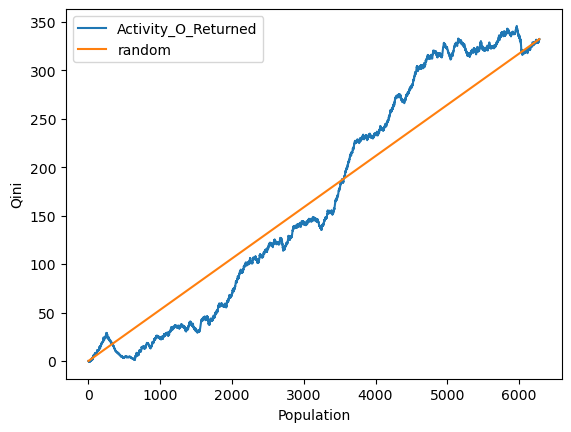

In [11]:
calc_and_plot_qini(why, test_data, 'Activity_O_Returned')

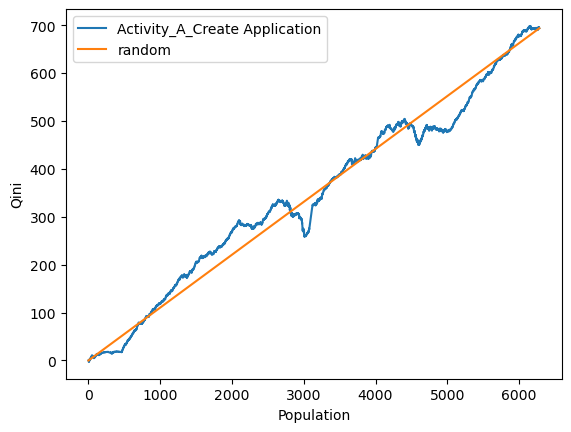

In [12]:
calc_and_plot_qini(why, test_data, 'Activity_A_Create Application')

In [6]:
why2 = Why(identifier='gcastle', random_state=23)
r2 = why2.identify(train_data, 'Outcome')
r2

(['Activity_O_Returned',
  'Activity_A_Create Application',
  'Activity_A_Incomplete'],
 None,
 ['Activity_A_Accepted',
  'Activity_A_Cancelled',
  'Activity_A_Complete',
  'Activity_A_Concept',
  'Activity_A_Denied',
  'Activity_A_Pending',
  'Activity_A_Submitted',
  'Activity_A_Validating',
  'Activity_O_Accepted',
  'Activity_O_Cancelled',
  'Activity_O_Create Offer',
  'Activity_O_Created',
  'Activity_O_Refused',
  'Activity_O_Sent (online only)',
  'Activity_W_Assess potential fraud',
  'Activity_W_Call after offers',
  'Activity_W_Call incomplete files',
  'Activity_W_Complete application',
  'Activity_W_Personal Loan collection',
  'Activity_W_Validate application'],
 None)

In [7]:
why3 = Why(identifier='pgm', random_state=23)
r3 = why3.identify(train_data, 'Outcome')
r3

2023-04-18 00:45:18,327 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/PC.py[line:368] - INFO: Reached maximum number of allowed conditional variables. Exiting
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/base/DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


(['Activity_W_Validate application'], None, ['Activity_O_Accepted'], None)

In [10]:
why3.fit(train_data, 'Outcome', treatment='Activity_W_Validate application')

2023-04-18 00:47:33,732 - /Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/estimators/PC.py[line:368] - INFO: Reached maximum number of allowed conditional variables. Exiting
/Users/lukas/opt/anaconda3/envs/ci_experiments/lib/python3.8/site-packages/pgmpy/base/DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


Why(discrete_outcome=True, discrete_treatment=True, identifier='pgm', random_state=23)

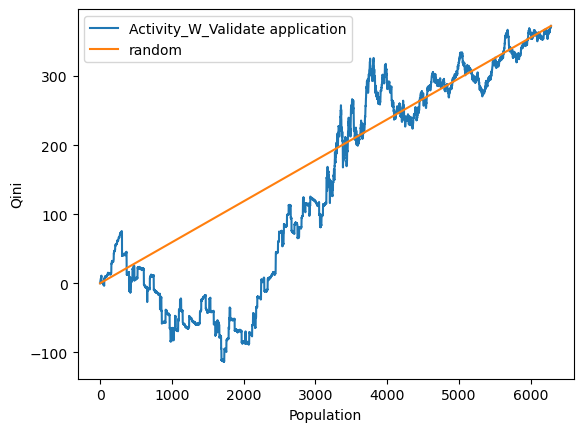

In [13]:
calc_and_plot_qini(why3, test_data, 'Activity_W_Validate application')

In [12]:
why3.causal_effect()

,,mean,min,max,std
Activity_W_Validate application,1.0 vs 0.0,0.095587,0.060691,0.130645,0.034977


In [18]:
why3.y_encoder_.classes_

array([0., 1.])

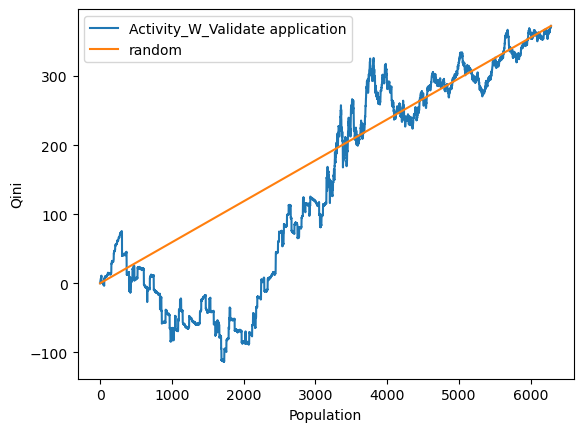

In [20]:
uplift = why3.uplift_model(test_data, treatment='Activity_W_Validate application', target_outcome=1)
qini = uplift.get_qini()
top = qini[qini.columns[0]].iat[-1]
idx = qini.index[-1]
plt.plot(qini.index, qini[qini.columns[0]], label='Activity_W_Validate application')
plt.plot((0, idx), (0, top), label='random')
plt.xlabel('Population')
plt.ylabel('Qini')
plt.legend()
plt.show()